In [2]:
#Import allnecessary modules and packages
import numpy as np
import pandas as pd
import scipy
from math import sqrt
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns 


from sklearn import preprocessing


#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold





#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix




#cross validation
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression






In [3]:
#Import Wifi Data

WifiTrainOrig = pd.read_csv("C:\\Users\\Owner\\Documents\\DataAnalyticsCourse\\C5_Task4\\trainingData.csv")
print(WifiTrainOrig.head())
WifiTrainOrig.info()

   WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0     100     100     100     100     100     100     100     100     100   
1     100     100     100     100     100     100     100     100     100   
2     100     100     100     100     100     100     100     -97     100   
3     100     100     100     100     100     100     100     100     100   
4     100     100     100     100     100     100     100     100     100   

   WAP010  ...  WAP520  LONGITUDE      LATITUDE  FLOOR  BUILDINGID  SPACEID  \
0     100  ...     100 -7541.2643  4.864921e+06      2           1      106   
1     100  ...     100 -7536.6212  4.864934e+06      2           1      106   
2     100  ...     100 -7519.1524  4.864950e+06      2           1      103   
3     100  ...     100 -7524.5704  4.864934e+06      2           1      102   
4     100  ...     100 -7632.1436  4.864982e+06      0           0      122   

   RELATIVEPOSITION  USERID  PHONEID   TIMESTAMP  
0          

0    106
1    106
2    103
3    102
4    122
Name: SPACEID, dtype: int64
0    G3
1    G3
2    G3
3    G3
4    G4
Name: SPACEIDCAT, dtype: category
Categories (9, object): [G1, G2, G3, G4, ..., G6, G7, G8, G9]
Target variable categories
SPACEID bins=[0,50,100,120,140,160,200,220,240,255],labels=[G1,G2,G3,G4,G5,G6,G7,G8,G9], Floors=[F0,F1,F2,F3,F4]
[F2G3, F0G4, F2G1, F2G7, F3G9, ..., F2G8, F2G9, F2G5, F1G1, F3G1]
Length: 30
Categories (30, object): [F2G3, F0G4, F2G1, F2G7, ..., F2G9, F2G5, F1G1, F3G1]
Distribution of New Target Variable
(19937, 520)


Text(0.5, 1.0, 'number of different readings per WAP')

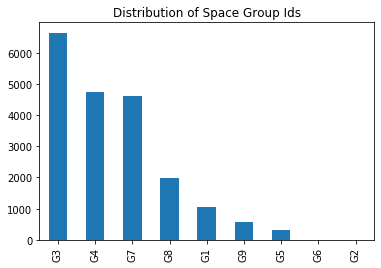

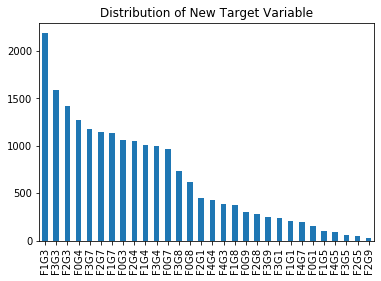

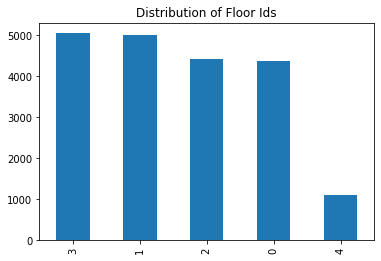

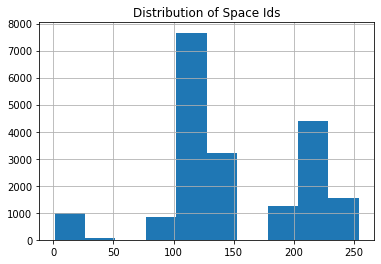

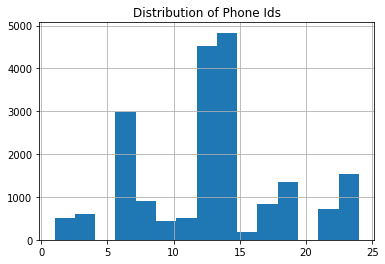

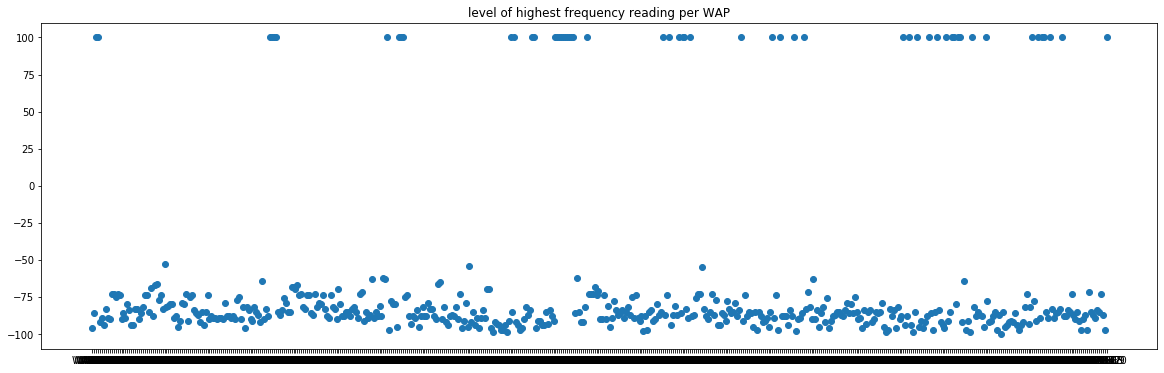

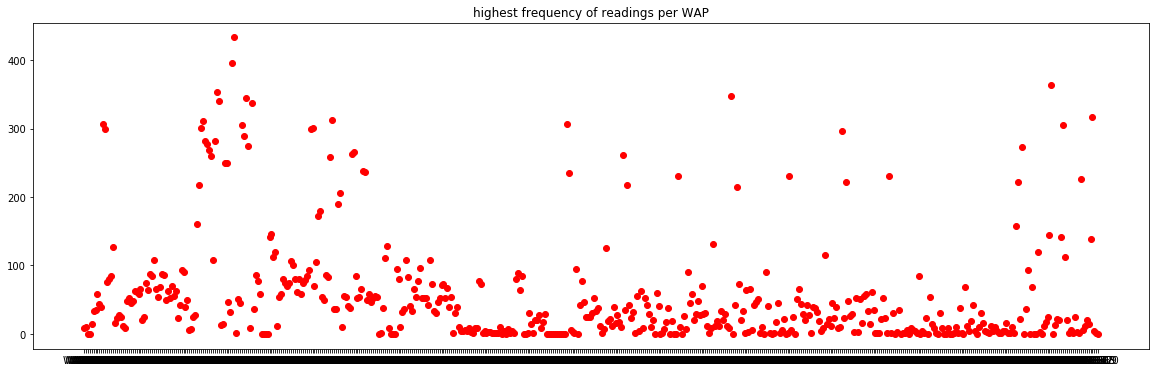

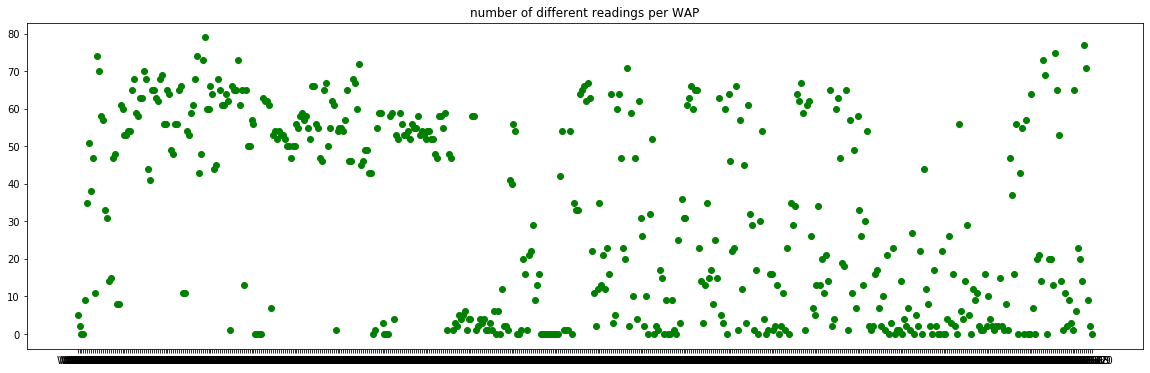

In [6]:
# pre process data based on previous experience to create new target variable

WifiTrainMod = WifiTrainOrig
print(WifiTrainMod['SPACEID'].head())
WifiTrainMod['SPACEIDCAT'] = pd.cut(x=WifiTrainMod['SPACEID'],bins=[0,50,100,120,140,160,200,220,240,255],labels=["G1","G2","G3","G4","G5","G6","G7","G8","G9"])
#WifiTrainMod['SPACEIDCAT'].astype('category')
WifiTrainMod['SPACEIDCAT'] = pd.Categorical(WifiTrainMod['SPACEIDCAT'],ordered=False)
print(WifiTrainMod['SPACEIDCAT'].head())

plt.figure()
WifiTrainMod['SPACEIDCAT'].value_counts().plot(kind='bar')
plt.title('Distribution of Space Group Ids')

WifiTrainMod['SPACEIDCAT'] = 'F'+ WifiTrainMod['FLOOR'].astype('str') + WifiTrainMod['SPACEIDCAT'].astype('str')

#WifiTrainMod['SPACEIDCAT'].astype('category')
WifiTrainMod['SPACEIDCAT'] = pd.Categorical(WifiTrainMod['SPACEIDCAT'],ordered=False)

print('Target variable categories')
print("SPACEID bins=[0,50,100,120,140,160,200,220,240,255],labels=[G1,G2,G3,G4,G5,G6,G7,G8,G9], Floors=[F0,F1,F2,F3,F4]")
print(WifiTrainMod['SPACEIDCAT'].unique())


##
########################
# Do data analysis on the data set
#####################


#WifiTrainMod['SPACEID'] = WifiTrainMod['SPACEID'].astype('categorical')
plt.figure()

print('Distribution of New Target Variable')
WifiTrainMod['SPACEIDCAT'].value_counts().plot(kind='bar')
plt.title('Distribution of New Target Variable')

plt.figure()
temp1 = WifiTrainMod['FLOOR'].astype('category')
temp1.value_counts().plot(kind='bar')
plt.title('Distribution of Floor Ids')

plt.figure()
WifiTrainMod['SPACEID'].hist()
plt.title('Distribution of Space Ids')

plt.figure()
histPh = WifiTrainMod['PHONEID'].hist(bins=15)
plt.title('Distribution of Phone Ids')

WifiTrainMod['PHONEID'].unique()








#PopPhones = WifiTrainMod.loc[WifiTrainMod['PHONEID'].isin([6,13,14])]
PopPhones = WifiTrainMod

PopPhonesWAP = PopPhones.iloc[:,0:520]
print(PopPhonesWAP.shape)

############3

#Do Analysis on WAP readings and try to find some patterns

################



#plt.figure(figsize=(20, 6))

#plt.matshow(PopPhonesWAP.corr())
#plt.title('corrMatrix of  WAP')

PopPhoneWAPCols = np.array(PopPhonesWAP.columns)
#print(PopPhoneWAPCols)
infoCols = []
MostLev =[]
MostLevFreq = []
WAPAllLev = []
#print(PopPhonesWAP['WAP004'].value_counts())
#temp1 = PopPhonesWAP['WAP004'].value_counts()
#print(temp1.index[0])

#print(PopPhonesWAP.columns)
for WAPcol in iter(PopPhoneWAPCols):
    FreQDat = PopPhonesWAP[WAPcol].value_counts()
#    print(WAPcol)
#    print(len(FreQDat))
    if FreQDat.index[0] == 100:
        
        if len(FreQDat) > 1:
            WAPAllLev.append(len(FreQDat)-1)
            #if FreQDat.iloc[1] > 25:
            infoCols.append(WAPcol)
                #print(FreQDat.index[1],FreQDat.iloc[1])
            MostLev.append(FreQDat.index[1])
            MostLevFreq.append(FreQDat.iloc[1])
        else:
            infoCols.append(WAPcol)
            WAPAllLev.append(len(FreQDat)-1)
            MostLev.append(100)
            MostLevFreq.append(0)
    else:
        WAPAllLev.append(len(FreQDat))
        #if FreQDat.iloc[0] > 25:
        infoCols.append(WAPcol)
            #print(FreQDat.index[0],FreQDat.iloc[0])
        MostLev.append(FreQDat.index[0])
        MostLevFreq.append(FreQDat.iloc[0])
            
#infoCols



plt.figure(figsize=(20, 6))

plt.scatter(infoCols,MostLev)
plt.title('level of highest frequency reading per WAP')

plt.figure(figsize=(20, 6))

plt.scatter(infoCols,MostLevFreq,c='red')
plt.title('highest frequency of readings per WAP')


plt.figure(figsize=(20, 6))

plt.scatter(PopPhoneWAPCols,WAPAllLev,c='green')
plt.title('number of different readings per WAP')


#####
#Less data for floor 4
#most data available for SPace IDs 100-15 and 200-225
#Phone Ids 13 and 14 are very popular in the dataset

###

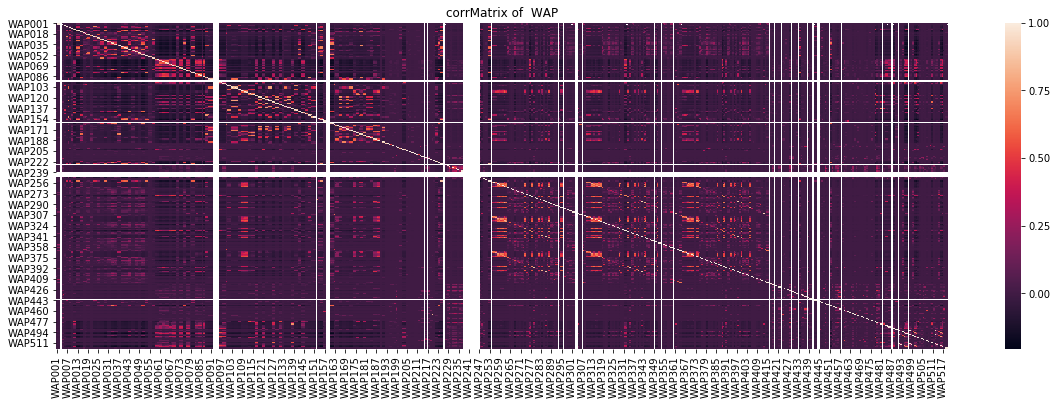

In [40]:
# Verify correlation of WAP readings

figNum = plt.figure(figsize=(20, 6))

#plt.matshow(PopPhonesWAP.corr(),fignum=figNum.number)

plt.title('corrMatrix of  WAP')
sns.heatmap(PopPhonesWAP.corr())



#Some High rcorrelation of WAP devices numbered close to each other 
#for WAPx numbered less than 200 and the ones number between 250 and 400
Since there is less variation in valid WAP readings and near by WAPs are expected to be strongly correlated from the assumption that all WAPs are of the same type, we expect some colinearity whch helps in more precise locationing.

Text(0.5, 1.0, 'number of different readings per WAP')

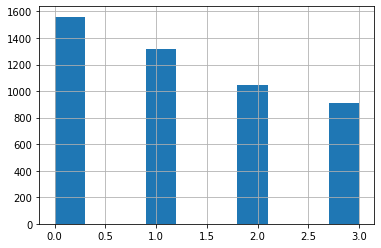

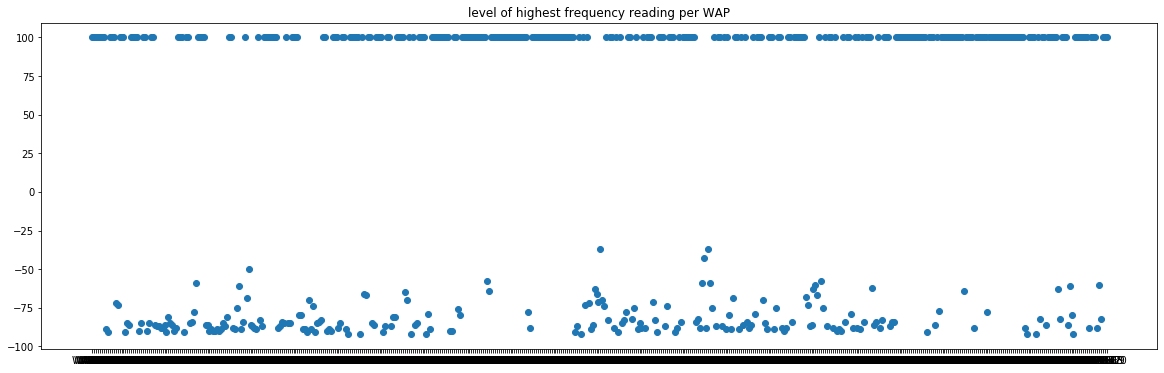

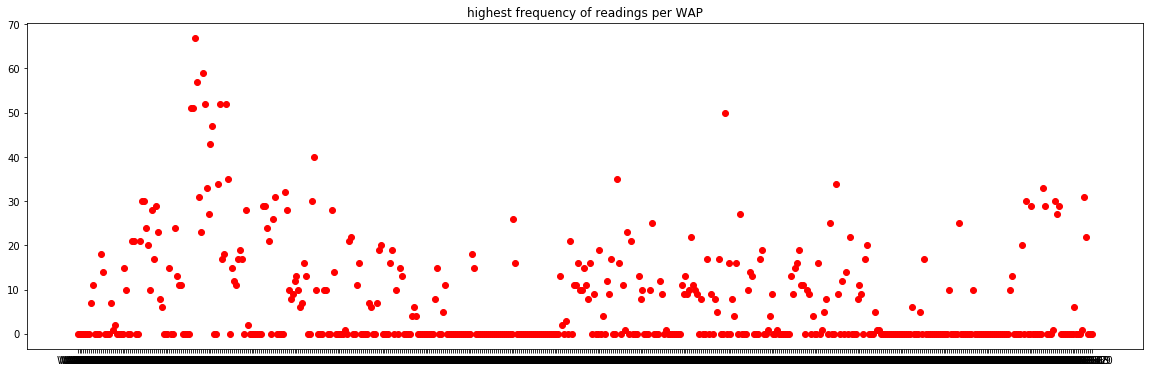

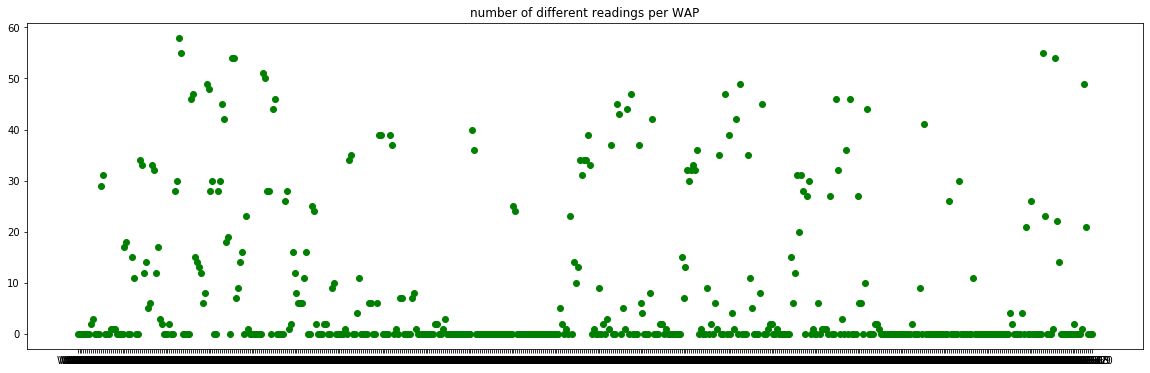

In [54]:
# EDA to see variability of WAPx
#Filter by popular phone ID

PopPhoneId = WifiTrainMod.loc[WifiTrainMod['PHONEID'].isin([14])]

PopPhoneId['FLOOR'].hist()


PopPhoneIdFx = PopPhoneId.loc[PopPhoneId['FLOOR'].isin([0])]


PopPhonesWAPIdFx = PopPhoneIdFx.iloc[:,0:520]
#print(PopPhonesWAP.shape)


#plt.figure(figsize=(20, 6))

#plt.matshow(PopPhonesWAP.corr())
#plt.title('corrMatrix of  WAP')

PopPhoneIdFxCols = np.array(PopPhonesWAPIdFx.columns)
#print(PopPhoneWAPCols)
infoCols2 = []
MostLev2 =[]
MostLevFreq2 = []
WAPAllLev2 = []
#print(PopPhonesWAP['WAP004'].value_counts())
#temp1 = PopPhonesWAP['WAP004'].value_counts()
#print(temp1.index[0])

#print(PopPhonesWAP.columns)
for WAPcol2 in iter(PopPhoneIdFxCols):
    FreQDat2 = PopPhonesWAPIdFx[WAPcol2].value_counts()
#    print(WAPcol)
#    print(len(FreQDat))
    if FreQDat2.index[0] == 100:
        
        if len(FreQDat2) > 1:
            WAPAllLev2.append(len(FreQDat2)-1)
            #if FreQDat.iloc[1] > 25:
            infoCols2.append(WAPcol2)
                #print(FreQDat.index[1],FreQDat.iloc[1])
            MostLev2.append(FreQDat2.index[1])
            MostLevFreq2.append(FreQDat2.iloc[1])
        else:
            infoCols2.append(WAPcol2)
            WAPAllLev2.append(len(FreQDat2)-1)
            MostLev2.append(100)
            MostLevFreq2.append(0)
    else:
        WAPAllLev2.append(len(FreQDat2))
        #if FreQDat.iloc[0] > 25:
        infoCols2.append(WAPcol2)
            #print(FreQDat.index[0],FreQDat.iloc[0])
        MostLev2.append(FreQDat2.index[0])
        MostLevFreq2.append(FreQDat2.iloc[0])
        

        
plt.figure(figsize=(20, 6))

plt.scatter(infoCols2,MostLev2)
plt.title('level of highest frequency reading per WAP')

plt.figure(figsize=(20, 6))

plt.scatter(infoCols2,MostLevFreq2,c='red')
plt.title('highest frequency of readings per WAP')


plt.figure(figsize=(20, 6))

plt.scatter(PopPhoneIdFxCols,WAPAllLev2,c='green')
plt.title('number of different readings per WAP')

####            

In [7]:
########################
#Data preparation and pre-processing for training models
######################


ct1 = ColumnTransformer(transformers=[('WAPlev','passthrough',slice(0,520,1)),
                                      ('NoNeed','drop',slice(520,529,1)),
                                      ('Target','passthrough',['SPACEIDCAT'])])
                                      

#print(WifiTrainMod.columns)
WifiColNames = np.array(WifiTrainMod.columns)

#WifiColNames[np.r_[0:520,529]]

WifiWAP=pd.DataFrame(ct1.fit_transform(WifiTrainMod),columns=WifiColNames[np.r_[0:520,529]])
#WifiWAP.head()
WifiWAPFtr1 = WifiWAP.drop(['SPACEIDCAT'],axis=1)
#print(np.array(WifiWAPFtr1.columns))


ct2 = ColumnTransformer(transformers=[('WAPVarSel',VarianceThreshold(),slice(0,520,1)),
                                      ('NoNeed','drop',[520])])

ct2.fit(WifiWAP)
colIndices = ct2.named_transformers_['WAPVarSel'].get_support(indices=True)
print('Cols selected after removing zero variance cols')
print(WifiColNames[colIndices])
#print(colIndices)

                                      
WifiWAPFtr2 = pd.DataFrame(ct2.fit_transform(WifiWAP),columns=WifiColNames[colIndices])
#WifiWAPFtr2.head()
print('Any na present?')
NAList = np.where(WifiWAPFtr1.isna()==True)
#print(NAList[1])
if (len(NAList[1]) < 1):
    print("No NAs")
else:
    print('NAs present')
    #TODO: take care of NAs
    


Cols selected after removing zero variance cols
['WAP001' 'WAP002' 'WAP005' 'WAP006' 'WAP007' 'WAP008' 'WAP009' 'WAP010'
 'WAP011' 'WAP012' 'WAP013' 'WAP014' 'WAP015' 'WAP016' 'WAP017' 'WAP018'
 'WAP019' 'WAP020' 'WAP021' 'WAP022' 'WAP023' 'WAP024' 'WAP025' 'WAP026'
 'WAP027' 'WAP028' 'WAP029' 'WAP030' 'WAP031' 'WAP032' 'WAP033' 'WAP034'
 'WAP035' 'WAP036' 'WAP037' 'WAP038' 'WAP039' 'WAP040' 'WAP041' 'WAP042'
 'WAP043' 'WAP044' 'WAP045' 'WAP046' 'WAP047' 'WAP048' 'WAP049' 'WAP050'
 'WAP051' 'WAP052' 'WAP053' 'WAP054' 'WAP055' 'WAP056' 'WAP057' 'WAP058'
 'WAP059' 'WAP060' 'WAP061' 'WAP062' 'WAP063' 'WAP064' 'WAP065' 'WAP066'
 'WAP067' 'WAP068' 'WAP069' 'WAP070' 'WAP071' 'WAP072' 'WAP073' 'WAP074'
 'WAP075' 'WAP076' 'WAP077' 'WAP078' 'WAP079' 'WAP080' 'WAP081' 'WAP082'
 'WAP083' 'WAP084' 'WAP085' 'WAP086' 'WAP087' 'WAP088' 'WAP089' 'WAP090'
 'WAP091' 'WAP096' 'WAP097' 'WAP098' 'WAP099' 'WAP100' 'WAP101' 'WAP102'
 'WAP103' 'WAP104' 'WAP105' 'WAP106' 'WAP107' 'WAP108' 'WAP109' 'WAP110'
 'W

In [8]:
#print(WifiTrainMod.columns)
WifiColNames = np.array(WifiTrainMod.columns)

#print(WifiColNames)
WifiColNames[np.r_[0:520]]

print('WAPs NOT SELCTED by variance threshold (=0)')

WifiNotSelWAP = np.delete(WifiWAPFtr1.columns,colIndices)
print(WifiNotSelWAP)

WAPs NOT SELCTED by variance threshold (=0)
Index(['WAP003', 'WAP004', 'WAP092', 'WAP093', 'WAP094', 'WAP095', 'WAP152',
       'WAP158', 'WAP159', 'WAP160', 'WAP215', 'WAP217', 'WAP226', 'WAP227',
       'WAP238', 'WAP239', 'WAP240', 'WAP241', 'WAP242', 'WAP243', 'WAP244',
       'WAP245', 'WAP246', 'WAP247', 'WAP254', 'WAP293', 'WAP296', 'WAP301',
       'WAP303', 'WAP304', 'WAP307', 'WAP333', 'WAP349', 'WAP353', 'WAP360',
       'WAP365', 'WAP416', 'WAP419', 'WAP423', 'WAP429', 'WAP433', 'WAP438',
       'WAP441', 'WAP442', 'WAP444', 'WAP445', 'WAP451', 'WAP458', 'WAP482',
       'WAP485', 'WAP487', 'WAP488', 'WAP491', 'WAP497', 'WAP520'],
      dtype='object')


In [9]:
#Check if any significant columns have been ignored by variancethreshold based selection of features
DatColsIgnored = False

#for WAP in iter(WifiNotSelCols[:len(WifiNotSelCols)-1]):
for WAP in iter(WifiNotSelWAP):
#        processLine(line)

    if (set(WifiWAP[WAP]) == {100} ):
        print(WAP,' Has no significant Data')
    else:
        DatColsIgnored = True
        print(WAP,' Has  Data')
   
if DatColsIgnored == True:
    print('Some Cols with significant  Data have been ignored')
else:
    print('No Cols with significant  Data have been ignored')
   

    
# Verified that all columns removed are the ones with no data readings

WAP003  Has no significant Data
WAP004  Has no significant Data
WAP092  Has no significant Data
WAP093  Has no significant Data
WAP094  Has no significant Data
WAP095  Has no significant Data
WAP152  Has no significant Data
WAP158  Has no significant Data
WAP159  Has no significant Data
WAP160  Has no significant Data
WAP215  Has no significant Data
WAP217  Has no significant Data
WAP226  Has no significant Data
WAP227  Has no significant Data
WAP238  Has no significant Data
WAP239  Has no significant Data
WAP240  Has no significant Data
WAP241  Has no significant Data
WAP242  Has no significant Data
WAP243  Has no significant Data
WAP244  Has no significant Data
WAP245  Has no significant Data
WAP246  Has no significant Data
WAP247  Has no significant Data
WAP254  Has no significant Data
WAP293  Has no significant Data
WAP296  Has no significant Data
WAP301  Has no significant Data
WAP303  Has no significant Data
WAP304  Has no significant Data
WAP307  Has no significant Data
WAP333  

In [10]:
##Replace default value of 100 with -300 to indicate very weak or non- existent signal for numerical WAP features

#Include fetures with default data only
XFeature = WifiWAPFtr1.replace(100,-300)

#Exclude features containing default data only
XFeature2 = WifiWAPFtr2.replace(100,-300)


# Try scaling the data
ct3 = ColumnTransformer(transformers=[('scaleBAL',preprocessing.MinMaxScaler(),np.array(XFeature2.columns))])

XFeature3 = pd.DataFrame(ct3.fit_transform(XFeature2),columns=np.array(XFeature2.columns))
XFeature3 = XFeature3.replace(100,-300)

In [11]:
#Specify target variable and do Train, test split

Ytarget = WifiWAP['SPACEIDCAT']
YtargetFLR = WifiTrainMod['FLOOR']

#XtrainCV,XtestCV,YtrainCV,YtestCV = train_test_split(XFeature,Ytarget,test_size=0.25)
XtrainCV,XtestCV,YtrainCV,YtestCV = train_test_split(XFeature2,Ytarget,test_size=0.25)


XtrainCV.shape,XtestCV.shape

((14952, 465), (4985, 465))

In [12]:
modelRF = RandomForestClassifier(n_estimators=20,n_jobs=-1)

modelRF.fit(XtrainCV,YtrainCV)
print('CV score metric')
print(cross_val_score(modelRF, XtrainCV, YtrainCV,cv=5))


CV score metric
[0.95605859 0.9593062  0.95051822 0.95474355 0.95799731]


In [13]:
#Metric from training
predictionsRF = modelRF.predict(XtestCV)
print('Metric from training set')
print(classification_report(YtestCV, predictionsRF))
#predictionsRF.dtype()

Metric from training set
              precision    recall  f1-score   support

        F0G1       1.00      0.98      0.99        44
        F0G3       0.97      0.97      0.97       258
        F0G4       0.98      0.97      0.98       310
        F0G7       0.97      0.95      0.96       262
        F0G8       0.92      0.97      0.94       173
        F0G9       0.96      0.85      0.90        61
        F1G1       0.98      1.00      0.99        46
        F1G3       0.98      0.98      0.98       535
        F1G4       0.96      0.98      0.97       246
        F1G5       0.95      0.83      0.88        23
        F1G7       0.97      0.99      0.98       306
        F1G8       0.97      0.90      0.93        99
        F2G1       0.99      1.00      0.99        82
        F2G3       0.95      0.99      0.97       336
        F2G4       0.98      0.94      0.96       268
        F2G5       1.00      1.00      1.00        12
        F2G7       1.00      0.99      0.99       306
  

In [108]:
#Floor only detection performance
# The goal is to predict the floor correctly almost 100% of the time

#print(predictionsRF[:11])
predictionsList = predictionsRF

#F0List = ['F0G1','F0G2','F0G3','F0G4','F0G5','F0G6','F0G7','F0G8','F0G9']
#F1List = ['F1G1','F1G2','F1G3','F1G4','F1G5','F1G6','F1G7','F1G8','F1G9']
#F2List = ['F2G1','F2G2','F2G3','F2G4','F2G5','F2G6','F2G7','F2G8','F2G9']
#F3List = ['F3G1','F3G2','F3G3','F3G4','F3G5','F3G6','F3G7','F3G8','F3G9']
#F4List = ['F4G1','F4G2','F4G3','F4G4','F4G5','F4G6','F4G7','F4G8','F4G9']

FlrPredict=[]

for elem in predictionsList.astype('str'):
        FlrPredict.append(elem[:2])

    
#    if elem in F0List:
#        FlrPredict.append(0)
#    if elem in F1List:
#        FlrPredict.append(1)
#    if elem in F2List:
#        FlrPredict.append(2)
#    if elem in F3List:
#        FlrPredict.append(3)
#    if elem in F4List:
#        FlrPredict.append(4)
          
#[F3G1,F3G2,F3G3,F3G4,F3G5,F3G6,F3G7,F3G8,F3G9],
          # 4:[F4G1,F4G2,F4G3,F4G4,F4G5,F4G6,F4G7,F4G8,F4G9],

#RFFlrPredict = np.vectorize(my_dict.get)(predictionsRF.astype('str'))
RFFlrPredict= FlrPredict

predictionsList = YtestCV

FlrPredict=[]

for elem in predictionsList.astype('str'):
    FlrPredict.append(elem[:2])
    
    
        
RFTrueFLR = FlrPredict

print(classification_report(RFTrueFLR, RFFlrPredict))


['F2G7' 'F2G3' 'F3G3' 'F3G7' 'F3G7' 'F4G7' 'F3G4' 'F3G3' 'F2G4' 'F0G9'
 'F1G3']
              precision    recall  f1-score   support

          F0       1.00      0.98      0.99      1117
          F1       0.99      1.00      1.00      1263
          F2       1.00      1.00      1.00      1094
          F3       0.99      1.00      0.99      1225
          F4       1.00      1.00      1.00       286

    accuracy                           0.99      4985
   macro avg       1.00      1.00      1.00      4985
weighted avg       0.99      0.99      0.99      4985



#All the classifications with support values >100 have high precision and recall except the ones with Floor 4. This is expected as there is less data for floor 4
#All floor identification is very good. May be an overfit for Floor 4 identification. Given the amount of data, this could be acceptable

In [86]:
modelKNN = KNeighborsClassifier(n_neighbors = 10, n_jobs = -1)

modelKNN.fit(XtrainCV,YtrainCV)
print('CV score metric')
print(cross_val_score(modelKNN, XtrainCV, YtrainCV,cv=5))


CV score metric
[0.87379287 0.87479132 0.86818334 0.87139987 0.88452501]


In [73]:
#Metric from training
predictionsKNN = modelKNN.predict(XtestCV)
print('Metric from training set')

print(classification_report(YtestCV, predictionsKNN))


Metric from training set
              precision    recall  f1-score   support

        F0G1       0.91      1.00      0.95        42
        F0G3       0.85      0.91      0.88       279
        F0G4       0.87      0.91      0.89       305
        F0G7       0.84      0.90      0.87       249
        F0G8       0.76      0.88      0.82       153
        F0G9       0.84      0.81      0.82        89
        F1G1       1.00      0.93      0.96        57
        F1G3       0.90      0.92      0.91       529
        F1G4       0.88      0.77      0.82       258
        F1G5       1.00      0.60      0.75        30
        F1G7       0.94      0.91      0.92       295
        F1G8       0.88      0.83      0.85        94
        F2G1       0.97      0.96      0.97       114
        F2G3       0.86      0.95      0.90       334
        F2G4       0.97      0.80      0.88       268
        F2G5       1.00      0.38      0.56        13
        F2G7       0.96      0.89      0.92       287
  

In [109]:
#Floor only detection performance
predictionsList = predictionsKNN

FlrPredict=[]

for elem in predictionsList.astype('str'):
        FlrPredict.append(elem[:2])

    

    
KNNFlrPredict= FlrPredict

predictionsList = YtestCV

FlrPredict=[]

for elem in predictionsList.astype('str'):
    FlrPredict.append(elem[:2])
    
    
        
KNNTrueFLR = FlrPredict

print(classification_report(KNNTrueFLR, KNNFlrPredict))


              precision    recall  f1-score   support

          F0       0.93      1.00      0.96      1117
          F1       0.98      0.94      0.96      1263
          F2       0.99      0.95      0.97      1094
          F3       0.97      0.99      0.98      1225
          F4       0.99      0.99      0.99       286

    accuracy                           0.97      4985
   macro avg       0.97      0.97      0.97      4985
weighted avg       0.97      0.97      0.97      4985



#The performance is good but slightly worse than RF
#Increasing  nearest neighbors does not help improving performance metrics much


In [48]:
modelLDA = LinearDiscriminantAnalysis()

modelLDA.fit(XtrainCV,YtrainCV)
print('CV score metric')
print(cross_val_score(modelLDA, XtrainCV, YtrainCV,cv=5))


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


CV score metric


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


[0.80985681 0.81836394 0.82034125 0.80910918 0.81738839]


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [49]:

predictionsLDA = modelLDA.predict(XtestCV)
print('Metric from training set')

print(classification_report(YtestCV, predictionsLDA))


Metric from training set
              precision    recall  f1-score   support

        F0G1       0.87      0.98      0.92        42
        F0G3       0.71      0.73      0.72       279
        F0G4       0.81      0.77      0.79       305
        F0G7       0.81      0.71      0.76       249
        F0G8       0.71      0.82      0.76       153
        F0G9       0.57      0.62      0.59        89
        F1G1       1.00      0.88      0.93        57
        F1G3       0.93      0.82      0.87       529
        F1G4       0.77      0.85      0.81       258
        F1G5       0.41      0.93      0.57        30
        F1G7       0.80      0.76      0.78       295
        F1G8       0.63      0.81      0.71        94
        F2G1       0.93      0.96      0.95       114
        F2G3       0.87      0.83      0.85       334
        F2G4       0.85      0.87      0.86       268
        F2G5       0.59      1.00      0.74        13
        F2G7       0.94      0.81      0.87       287
  

In [110]:
#Floor only detection performance
predictionsList = predictionsLDA



FlrPredict=[]

for elem in predictionsList.astype('str'):
        FlrPredict.append(elem[:2])

    
LDAFlrPredict= FlrPredict

predictionsList = YtestCV

FlrPredict=[]

for elem in predictionsList.astype('str'):
    FlrPredict.append(elem[:2])
    
    
        
LDATrueFLR = FlrPredict

print(classification_report(LDATrueFLR, LDAFlrPredict))


              precision    recall  f1-score   support

          F0       0.96      0.96      0.96      1117
          F1       0.94      0.94      0.94      1263
          F2       0.96      0.94      0.95      1094
          F3       0.95      0.96      0.96      1225
          F4       0.99      0.94      0.96       286

    accuracy                           0.95      4985
   macro avg       0.96      0.95      0.95      4985
weighted avg       0.95      0.95      0.95      4985



#LDA is tried  since the features have linear relationship as all the WAPs are assumed to be the same type and configured in the same way
#Some colinearity is obsorved in corr matrix
#This probably makes this model perform worse than RF and KNN

In [69]:
#Use normalized WAPs features
XtrainCV2,XtestCV2,YtrainCV2,YtestCV2 = train_test_split(XFeature3,Ytarget,test_size=0.25)


XtrainCV2.shape,XtestCV2.shape

((14952, 465), (4985, 465))

In [70]:
#Run LDA with normalized features
#modelLDA = LinearDiscriminantAnalysis()

modelLDA.fit(XtrainCV2,YtrainCV2)
print('CV score metric')
print(cross_val_score(modelLDA, XtrainCV2, YtrainCV2,cv=5))


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


CV score metric


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


[0.80746169 0.81127042 0.80708793 0.81126383 0.81894525]


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [71]:
#LDA prediction

predictionsLDA2 = modelLDA.predict(XtestCV2)
print('Metric from training set')

print(classification_report(YtestCV2, predictionsLDA2))


Metric from training set
              precision    recall  f1-score   support

        F0G1       0.94      1.00      0.97        45
        F0G3       0.71      0.82      0.76       267
        F0G4       0.87      0.76      0.81       336
        F0G7       0.80      0.76      0.78       243
        F0G8       0.78      0.87      0.82       184
        F0G9       0.59      0.68      0.63        69
        F1G1       1.00      0.94      0.97        52
        F1G3       0.93      0.81      0.87       540
        F1G4       0.75      0.82      0.79       262
        F1G5       0.40      0.96      0.57        28
        F1G7       0.82      0.76      0.79       296
        F1G8       0.64      0.81      0.72        96
        F2G1       0.93      0.99      0.96       107
        F2G3       0.87      0.80      0.83       369
        F2G4       0.82      0.84      0.83       261
        F2G5       0.41      1.00      0.58        11
        F2G7       0.93      0.76      0.83       271
  

In [112]:
#Floor only detection performance
predictionsList = predictionsLDA2

FlrPredict=[]

for elem in predictionsList.astype('str'):
        FlrPredict.append(elem[:2])

    

LDA2FlrPredict= FlrPredict

predictionsList = YtestCV

FlrPredict=[]

for elem in predictionsList.astype('str'):
    FlrPredict.append(elem[:2])
    
    
        
LDA2TrueFLR = FlrPredict

print(classification_report(LDA2TrueFLR, LDA2FlrPredict))


              precision    recall  f1-score   support

          F0       0.22      0.23      0.23      1117
          F1       0.26      0.26      0.26      1263
          F2       0.23      0.22      0.23      1094
          F3       0.27      0.26      0.27      1225
          F4       0.07      0.06      0.06       286

    accuracy                           0.24      4985
   macro avg       0.21      0.21      0.21      4985
weighted avg       0.24      0.24      0.24      4985



In [156]:
#Predict floors on holdout set 

WifiValidOrig = pd.read_csv("C:\\Users\\Owner\\Documents\\DataAnalyticsCourse\\C5_Task4\\validationData.csv")
#print(WifiValidOrig.head())
#WifiValidOrig.info()


WifiValidFtr = WifiValidOrig[WifiColNames[colIndices]]
WifiValidFtr.info()

WifiValidFtrIn = WifiValidFtr.replace(100,-300)

predictValid = modelRF.predict(WifiValidFtrIn)
#print(np.info(predictValid))

#print(predictValid[:10])

predictionsList = predictValid

FlrPredict=[]

for elem in predictionsList.astype('str'):
        FlrPredict.append(elem[:2])

ValFlrPredict = FlrPredict
#print(ValFlrPredict[:10])


predictionsList = WifiValidOrig['FLOOR']
ValTrueFlr= WifiValidOrig['FLOOR'].replace([0,1,2,3,4],['F0','F1','F2','F3','F4'])
        
#print(ValTrueFlr[:10])


print(classification_report(ValTrueFlr, ValFlrPredict))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Columns: 465 entries, WAP001 to WAP519
dtypes: int64(465)
memory usage: 3.9 MB
              precision    recall  f1-score   support

          F0       0.92      0.92      0.92       132
          F1       0.97      0.87      0.91       462
          F2       0.82      0.93      0.87       306
          F3       0.87      0.95      0.91       172
          F4       0.96      0.69      0.81        39

    accuracy                           0.90      1111
   macro avg       0.91      0.87      0.88      1111
weighted avg       0.91      0.90      0.90      1111



In [22]:
#Since the validation set has Floor information, we can try including the dummy variables for the floor identification in the model

#ct4 = ColumnTransformer(transformers=[('oneHot',preprocessing.OneHotEncoder())])
#temp10 = pd.DataFrame(ct4.fit_transform(WifiTrainMod['FLOOR'].astype('category')))

FLRDummy = pd.get_dummies(WifiTrainMod['FLOOR'].astype('category'),prefix ='F')
FLRDummy.head()

,F_0,F_1,F_2,F_3,F_4
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,1,0,0,0,0


In [25]:
XFeature4 = XFeature2
XFeature4['F_0']= FLRDummy['F_0']
XFeature4['F_1']= FLRDummy['F_1']
XFeature4['F_2']= FLRDummy['F_2']
XFeature4['F_3']= FLRDummy['F_3']
XFeature4['F_4']= FLRDummy['F_4']

#XFeature4.head()
XtrainCV3,XtestCV3,YtrainCV3,YtestCV3 = train_test_split(XFeature4,Ytarget,test_size=0.25)


XtrainCV3.shape,XtestCV3.shape

modelRF3 = RandomForestClassifier(n_estimators=20,n_jobs=-1)

modelRF3.fit(XtrainCV3,YtrainCV3)
print('CV score metric')
print(cross_val_score(modelRF3, XtrainCV3, YtrainCV3,cv=5))


CV score metric
[0.96033333 0.96664443 0.95721925 0.95743968 0.96138348]


In [26]:
predictionsRF3 = modelRF3.predict(XtestCV3)
print('Metric from training set')
print(classification_report(YtestCV3, predictionsRF3))

Metric from training set
              precision    recall  f1-score   support

        F0G1       1.00      1.00      1.00        45
        F0G3       0.97      0.97      0.97       257
        F0G4       0.98      0.98      0.98       321
        F0G7       0.97      0.98      0.97       246
        F0G8       0.92      0.99      0.95       142
        F0G9       0.98      0.84      0.91        75
        F1G1       1.00      1.00      1.00        33
        F1G3       0.98      0.98      0.98       576
        F1G4       0.95      0.96      0.95       252
        F1G5       0.94      0.80      0.86        20
        F1G7       0.98      0.98      0.98       300
        F1G8       0.93      0.95      0.94        97
        F2G1       1.00      1.00      1.00       109
        F2G3       0.97      0.98      0.97       346
        F2G4       0.97      0.95      0.96       261
        F2G5       1.00      1.00      1.00        11
        F2G7       0.98      0.99      0.98       295
  

#performance of Floor 4 classes is slightly decreased when floor number dummy variables are used
#Relative to increase in complexity there is not much performance gained. Hence, the floor number dummy variables may be gnored and earlier  RF model may be used

In [27]:
modelLDA3 = LinearDiscriminantAnalysis()

modelLDA3.fit(XtrainCV3,YtrainCV3)
print('CV score metric')
print(cross_val_score(modelLDA3, XtrainCV3, YtrainCV3,cv=5))

predictionsLDA3 = modelLDA3.predict(XtestCV3)
print('Metric from training set')

print(classification_report(YtestCV3, predictionsLDA3))

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


CV score metric


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


[0.819      0.81921281 0.80648396 0.81132708 0.81329752]
Metric from training set
              precision    recall  f1-score   support

        F0G1       0.91      0.87      0.89        45
        F0G3       0.70      0.75      0.73       257
        F0G4       0.85      0.76      0.80       321
        F0G7       0.82      0.80      0.81       246
        F0G8       0.74      0.90      0.82       142
        F0G9       0.62      0.57      0.60        75
        F1G1       1.00      0.94      0.97        33
        F1G3       0.92      0.82      0.86       576
        F1G4       0.75      0.87      0.81       252
        F1G5       0.31      0.95      0.46        20
        F1G7       0.80      0.76      0.78       300
        F1G8       0.65      0.79      0.72        97
        F2G1       0.90      0.95      0.93       109
        F2G3       0.88      0.80      0.84       346
        F2G4       0.82      0.87      0.84       261
        F2G5       0.52      1.00      0.69        11

#Not much improvement relative to RF

In [30]:
WifiWAPFtr1.min().min()

-104.0